In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [25]:
songs = pd.read_csv('../../datasets/currently_dataset/song_decades_long.csv')
d1 = songs[songs.Genre1=='Hip Hop']
d2 = songs[songs.Genre1=='Folk, World, & Country']
d3 = songs[songs.Genre1=='Jazz']
d4 = songs[songs.Genre1=='Electronic']

vier = pd.concat([d1, d2, d3, d4])
vier.to_csv('vier_genres.csv')

In [26]:
zscores = pd.read_csv('zscores_vier_genres.csv', index_col=[0])
# zscores.index = zscores['Unnamed: 0']
zscores

,the,you,my,that,i'm,your,like,but,with,don't,...,memories,choose,thirty,birds,murder,plan,hip,belong,spit,point
Hip Hop_Eminem-1990s,-0.698645,-0.282386,-0.366302,-1.175296,1.662890,0.485097,-0.458403,-0.388910,0.081805,0.003727,...,-0.298865,-0.349686,-0.174785,0.523826,6.004848,1.693180,-0.183680,-0.274797,-0.409983,-0.392843
Hip Hop_Eminem-2000s,-0.441441,-0.212250,0.275478,-0.560086,0.153699,-0.161397,0.336855,-0.091081,0.030575,0.192217,...,-0.298865,-0.349686,-0.174785,-0.268576,0.464038,-0.344461,0.281241,-0.274797,1.671911,0.274638
Hip Hop_Eminem-2010s,-0.735573,1.378929,-0.040635,-0.364378,1.636435,-0.771706,0.420991,2.947960,-0.476233,0.780431,...,-0.298865,-0.349686,-0.174785,-0.268576,-0.305261,-0.344461,-0.183680,-0.274797,6.365130,-0.392843
Hip Hop_Fabolous-2000s,-0.002248,-0.096449,-0.346478,0.174192,1.361129,-0.491464,1.301146,0.443414,0.471641,0.402114,...,-0.134902,0.035644,-0.174785,0.327007,0.033509,-0.344461,0.225787,-0.274797,0.736001,0.929857
Hip Hop_Fabolous-2010s,-1.027127,-0.741727,0.065040,0.431596,-0.270269,-0.357526,7.209709,-0.392401,-0.902631,-0.638285,...,-0.298865,-0.349686,-0.174785,-0.268576,-0.305261,-0.344461,-0.183680,1.015091,-0.409983,-0.392843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Electronic_Vanilla Ice-2000s,0.677993,-0.853866,-1.107774,-1.159393,0.873307,-0.144307,0.629163,-1.003407,2.533789,-0.843781,...,-0.298865,1.297769,-0.174785,-0.268576,1.143132,1.292527,12.070899,-0.274797,5.469526,-0.392843
Electronic_Wang Chung-1980s,0.930907,0.062927,-1.402743,-1.294194,-0.963911,1.233062,-0.036747,-1.091199,-1.358084,-0.577793,...,-0.298865,-0.349686,-0.174785,-0.268576,-0.305261,-0.344461,-0.183680,1.105136,-0.409983,-0.392843
Electronic_XTC-1980s,0.488057,-0.182169,-0.915429,-0.338788,0.472898,1.231326,-0.306772,0.385854,-0.554200,-0.132235,...,-0.298865,-0.349686,-0.174785,0.227102,-0.305261,-0.344461,-0.183680,-0.274797,1.116022,-0.392843
Electronic_Yello-1980s,0.257403,-0.461322,-0.273638,0.243282,0.456602,1.583783,-0.588259,-1.146490,-1.504313,1.732422,...,-0.298865,-0.349686,-0.174785,-0.268576,-0.305261,-0.344461,-0.183680,-0.274797,-0.409983,-0.392843


In [27]:
is_NaN = zscores.isnull()

row_has_NaN = is_NaN.any(axis=1)

rows_with_NaN = zscores[row_has_NaN]
rows_with_NaN

,the,you,my,that,i'm,your,like,but,with,don't,...,memories,choose,thirty,birds,murder,plan,hip,belong,spit,point


In [54]:
# zscores = zscores.dropna(how='all')
# zscores.to_csv('../results/delta/vergleich/zscores_vergleich.csv')

### compare delta values for texts by same and different authors

In [28]:
f = pd.read_hdf('delta_vier_genres.h5')
f = f[f.cosine!=1.0]
f = f.sort_values(by=['cosine', 'manhattan'])
f

,manhattan,cosine,labelgenre,labelauthor,genres,vergleichsgenre,vergleichsautor,author
"Folk, World, & Country_John Denver-1970s",554.94,-0.21,different,different,"Folk, World, & Country",Hip Hop,Ice Cube-1990s,John Denver-1970s
Hip Hop_Ice Cube-1990s,554.94,-0.21,different,different,Hip Hop,"Folk, World, & Country",John Denver-1970s,Ice Cube-1990s
"Folk, World, & Country_Tim McGraw-1990s",567.55,-0.19,different,different,"Folk, World, & Country",Hip Hop,The Notorious B.I.G.-1990s,Tim McGraw-1990s
Hip Hop_The Notorious B.I.G.-1990s,567.55,-0.19,different,different,Hip Hop,"Folk, World, & Country",Tim McGraw-1990s,The Notorious B.I.G.-1990s
"Folk, World, & Country_John Denver-1970s",587.42,-0.19,different,different,"Folk, World, & Country",Hip Hop,The Notorious B.I.G.-1990s,John Denver-1970s
...,...,...,...,...,...,...,...,...
Hip Hop_Z-Ro-2000s,424.66,0.45,same,different,Hip Hop,Hip Hop,Z-Ro-2010s,Z-Ro-2000s
Hip Hop_Lil Wayne-2000s,342.10,0.46,same,different,Hip Hop,Hip Hop,Jeezy-2000s,Lil Wayne-2000s
Hip Hop_Jeezy-2000s,342.10,0.46,same,different,Hip Hop,Hip Hop,Lil Wayne-2000s,Jeezy-2000s
Hip Hop_Gucci Mane-2010s,398.57,0.49,same,different,Hip Hop,Hip Hop,Gucci Mane-2000s,Gucci Mane-2010s


In [5]:
hiphop = f[f.genres=='Hip Hop']
# hiphop['labelgenre'].value_counts()
hiphop = hiphop.sort_values(by=['cosine', 'manhattan'])
hiphop

,manhattan,cosine,labelgenre,labelauthor,genres,vergleichsgenre,vergleichsautor,author
Hip Hop_Ice Cube-1990s,554.94,-0.21,different,different,Hip Hop,"Folk, World, & Country",John Denver-1970s,Ice Cube-1990s
Hip Hop_The Notorious B.I.G.-1990s,567.55,-0.19,different,different,Hip Hop,"Folk, World, & Country",Tim McGraw-1990s,The Notorious B.I.G.-1990s
Hip Hop_The Notorious B.I.G.-1990s,587.42,-0.19,different,different,Hip Hop,"Folk, World, & Country",John Denver-1970s,The Notorious B.I.G.-1990s
Hip Hop_Wu-Tang Clan-1990s,545.65,-0.18,different,different,Hip Hop,"Folk, World, & Country",Tim McGraw-2000s,Wu-Tang Clan-1990s
Hip Hop_Nicki Minaj-2010s,566.68,-0.18,different,different,Hip Hop,"Folk, World, & Country",Gordon Lightfoot-1970s,Nicki Minaj-2010s
...,...,...,...,...,...,...,...,...
Hip Hop_Z-Ro-2000s,424.66,0.45,same,different,Hip Hop,Hip Hop,Z-Ro-2010s,Z-Ro-2000s
Hip Hop_Lil Wayne-2000s,342.10,0.46,same,different,Hip Hop,Hip Hop,Jeezy-2000s,Lil Wayne-2000s
Hip Hop_Jeezy-2000s,342.10,0.46,same,different,Hip Hop,Hip Hop,Lil Wayne-2000s,Jeezy-2000s
Hip Hop_Gucci Mane-2010s,398.57,0.49,same,different,Hip Hop,Hip Hop,Gucci Mane-2000s,Gucci Mane-2010s


In [20]:
f[f.cosine>0.35]

,manhattan,cosine,labelgenre,labelauthor,genres,vergleichsgenre,vergleichsautor,author
Hip Hop_Lil Wayne-2000s,336.15,0.45,same,different,Hip Hop,Hip Hop,Fabolous-2000s,Lil Wayne-2000s
Hip Hop_Jeezy-2000s,336.51,0.38,same,different,Hip Hop,Hip Hop,Fabolous-2000s,Jeezy-2000s
Hip Hop_Gucci Mane-2010s,398.57,0.49,same,different,Hip Hop,Hip Hop,Gucci Mane-2000s,Gucci Mane-2010s
Hip Hop_Jeezy-2000s,365.58,0.38,same,different,Hip Hop,Hip Hop,Gucci Mane-2010s,Jeezy-2000s
Hip Hop_Gucci Mane-2000s,398.57,0.49,same,different,Hip Hop,Hip Hop,Gucci Mane-2010s,Gucci Mane-2000s
Hip Hop_Migos-2010s,404.83,0.36,same,different,Hip Hop,Hip Hop,Gucci Mane-2010s,Migos-2010s
Hip Hop_The Notorious B.I.G.-1990s,326.78,0.37,same,different,Hip Hop,Hip Hop,Ice Cube-1990s,The Notorious B.I.G.-1990s
Hip Hop_Ice Cube-2010s,356.76,0.43,same,different,Hip Hop,Hip Hop,Ice Cube-1990s,Ice Cube-2010s
Hip Hop_Ice Cube-2000s,362.53,0.41,same,different,Hip Hop,Hip Hop,Ice Cube-1990s,Ice Cube-2000s
Hip Hop_Ice Cube-1990s,362.53,0.41,same,different,Hip Hop,Hip Hop,Ice Cube-2000s,Ice Cube-1990s


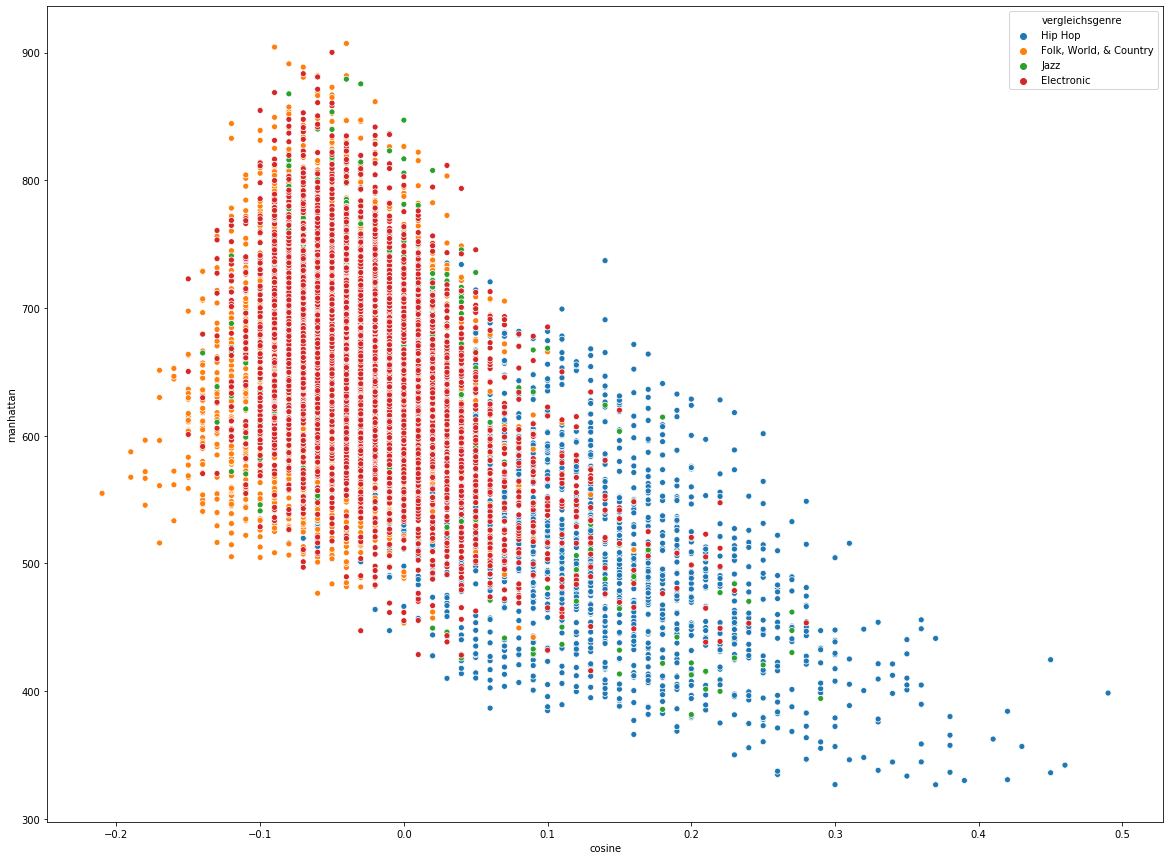

In [22]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='cosine', y='manhattan', hue='vergleichsgenre', data=hiphop)
plt.savefig('../../images/Bilder_Abschlusspräsi/delta_verteilung_hiphop.png')

In [12]:
f_sorted = f.sort_values(by=['cosine'])
f_sorted = f_sorted[f_sorted.cosine!=1.0]
f_sorted

,manhattan,cosine,labelgenre,labelauthor,genres,vergleichsgenre,vergleichsautor,author
"Folk, World, & Country_John Denver-1970s",554.94,-0.21,different,different,"Folk, World, & Country",Hip Hop,Ice Cube-1990s,John Denver-1970s
Hip Hop_Ice Cube-1990s,554.94,-0.21,different,different,Hip Hop,"Folk, World, & Country",John Denver-1970s,Ice Cube-1990s
Hip Hop_The Notorious B.I.G.-1990s,567.55,-0.19,different,different,Hip Hop,"Folk, World, & Country",Tim McGraw-1990s,The Notorious B.I.G.-1990s
"Folk, World, & Country_Tim McGraw-1990s",567.55,-0.19,different,different,"Folk, World, & Country",Hip Hop,The Notorious B.I.G.-1990s,Tim McGraw-1990s
"Folk, World, & Country_John Denver-1970s",587.42,-0.19,different,different,"Folk, World, & Country",Hip Hop,The Notorious B.I.G.-1990s,John Denver-1970s
...,...,...,...,...,...,...,...,...
Hip Hop_Z-Ro-2000s,424.66,0.45,same,different,Hip Hop,Hip Hop,Z-Ro-2010s,Z-Ro-2000s
Hip Hop_Jeezy-2000s,342.10,0.46,same,different,Hip Hop,Hip Hop,Lil Wayne-2000s,Jeezy-2000s
Hip Hop_Lil Wayne-2000s,342.10,0.46,same,different,Hip Hop,Hip Hop,Jeezy-2000s,Lil Wayne-2000s
Hip Hop_Gucci Mane-2010s,398.57,0.49,same,different,Hip Hop,Hip Hop,Gucci Mane-2000s,Gucci Mane-2010s


In [10]:
f_sorted[-20:]

,manhattan,cosine,labelgenre,labelauthor,genres,author
Hip Hop_Lil Wayne-2000s,265.14,0.57,same,different,Hip Hop,Lil Wayne-2000s
Rock_YG-2010s,350.97,0.57,different,different,Rock,YG-2010s
Hip Hop_Snoop Dogg-1990s,350.97,0.57,different,different,Hip Hop,Snoop Dogg-1990s
Hip Hop_Fabolous-2000s,265.14,0.57,same,different,Hip Hop,Fabolous-2000s
Hip Hop_Ice Cube-1990s,293.96,0.58,same,different,Hip Hop,Ice Cube-1990s
Hip Hop_Ice Cube-1990s,297.15,0.58,same,different,Hip Hop,Ice Cube-1990s
Hip Hop_Young Buck-2000s,320.13,0.58,same,different,Hip Hop,Young Buck-2000s
Hip Hop_Snoop Dogg-2000s,294.36,0.58,same,different,Hip Hop,Snoop Dogg-2000s
Hip Hop_Jeezy-2000s,320.13,0.58,same,different,Hip Hop,Jeezy-2000s
Hip Hop_Ice Cube-2010s,297.15,0.58,same,different,Hip Hop,Ice Cube-2010s


[Text(0, 0.5, 'Count')]

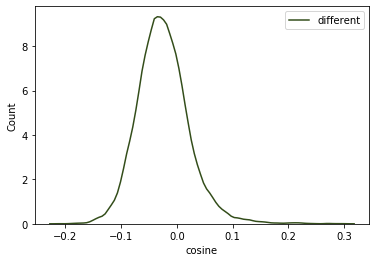

In [13]:
#nur wenn beide Label different bzw same sind
ax = sns.distplot(f_sorted['cosine'][(f_sorted['labelgenre']=='different')&(f_sorted['labelauthor']=='different')], hist=False, label='different', color=(0.2, 0.3, 0.1))
ax = sns.distplot(f_sorted['cosine'][(f_sorted['labelgenre']=='same')&(f_sorted['labelauthor']=='same')], hist=False, label='same', color='g')
ax.set(ylabel='Count')

[Text(0, 0.5, 'Count')]

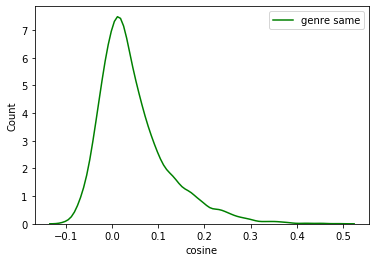

In [14]:
# nur wenn eine Label different, anderes same ist
ax = sns.distplot(f_sorted['cosine'][(f_sorted['labelgenre']=='different')&(f_sorted['labelauthor']=='same')], hist=False, label='genre different', color=(0.2, 0.3, 0.1))
ax = sns.distplot(f_sorted['cosine'][(f_sorted['labelgenre']=='same')&(f_sorted['labelauthor']=='different')], hist=False, label='genre same', color='g')
ax.set(ylabel='Count')

In [25]:
#pro Label eine different und same Kurve
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['labelgenre']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax = sns.distplot(delta['cosine'][delta['labelgenre']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax.lines[1]

#     Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
    plt.savefig('../../images/Bilder_Abschlusspräsi/delta_same_dif_hiphop')
    plt.legend()
    plt.show()

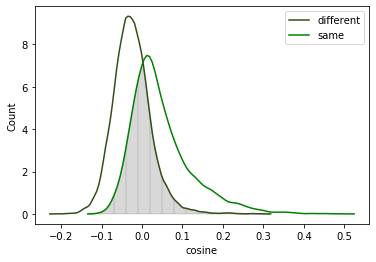

In [24]:
f = f[f.cosine!=1.00]
# mfw = file.replace(prefix, "").split('_')[0]
# corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
same_dif(f)
#     if mfw == '1000':
#         same_dif(delta)


In [26]:
hiphop = f[f.genres=='Hip Hop']
hiphop

,manhattan,cosine,labelgenre,labelauthor,genres,vergleichsgenre,vergleichsautor,author
Hip Hop_Eminem-2000s,432.00,0.24,same,different,Hip Hop,Hip Hop,Eminem-1990s,Eminem-2000s
Hip Hop_Ice Cube-1990s,442.37,0.16,same,different,Hip Hop,Hip Hop,Eminem-1990s,Ice Cube-1990s
Hip Hop_The Notorious B.I.G.-1990s,458.46,0.14,same,different,Hip Hop,Hip Hop,Eminem-1990s,The Notorious B.I.G.-1990s
Hip Hop_Wu-Tang Clan-2000s,460.06,0.26,same,different,Hip Hop,Hip Hop,Eminem-1990s,Wu-Tang Clan-2000s
Hip Hop_Insane Clown Posse-1990s,460.27,0.17,same,different,Hip Hop,Hip Hop,Eminem-1990s,Insane Clown Posse-1990s
...,...,...,...,...,...,...,...,...
Hip Hop_Yukmouth-2000s,716.40,-0.06,different,different,Hip Hop,Electronic,Yello-1990s,Yukmouth-2000s
Hip Hop_Young Buck-2000s,717.96,-0.07,different,different,Hip Hop,Electronic,Yello-1990s,Young Buck-2000s
Hip Hop_Lil Wayne-1990s,760.97,-0.04,different,different,Hip Hop,Electronic,Yello-1990s,Lil Wayne-1990s
Hip Hop_Young Dro-2000s,767.41,-0.04,different,different,Hip Hop,Electronic,Yello-1990s,Young Dro-2000s


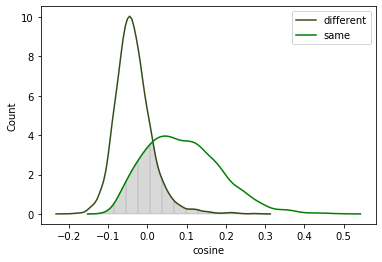

In [27]:
same_dif(hiphop)